In [45]:
import sys; sys.path.insert(0, '..')
from dot_plots import *
import Merge_Cartesian as MC

%matplotlib widget

In [46]:
TL= '7'
TC= '6'
layers = 10

(Numbers, 
Major_Grid_x, Major_Grid_y,
Minor_Grid_x, Minor_Grid_y,
Sending_Grid_x, Sending_Grid_y,
Recieivng_Grid_x, Recieivng_Grid_y,
Line_Grid_px, Line_Grid_py,
Letters) = calcualte_numbers_and_grids_and_lines(TL,TC,layers)
float_Numbers = [float(n) for n in Numbers]

In [47]:
ZL = '100'
ZC = '1'

number_periods = 1

Inductor_List =    [ZL   ,TL  ,'1']
Capacitor_List =   [ZC   ,TC  ,'1']
Circuit_List =   ['1'      , number_periods, False, '12']
(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        350.0
Inductor Capacitance Per Length :       0.035
Inductor Length :                       1
Inductor Total Inductance :             350.0
Inductor Total Capacitance :            0.035
Inductor Velocity :                     0.2857142857142857142857142857
Inductor Time Delay :                   3.5
Inductor Impedance :                    100

- The Capacitor -
Capacitor Inductance Per Length :       3
Capacitor Capacitance Per Length :      3
Capacitor Length :                      1
Capacitor Total Inductance :            3
Capacitor Total Capacitance :           3
Capacitor Velocity :                    0.3333333333333333333333333333
Capacitor Time Delay :                  3
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  203.5984736793985951111420393
Number of Wavefronts :                  2520
Number

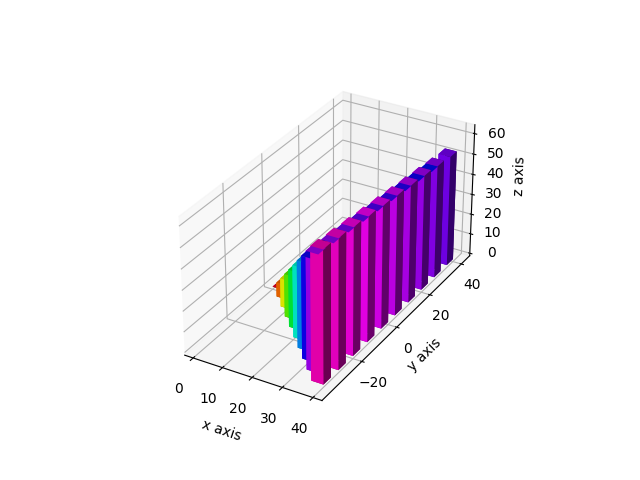

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = Major_Grid_x[:len(Numbers)]#[1,2,3,4,5,6,7,8,9,10]
y3 = Major_Grid_y[:len(Numbers)]#[5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(len(Numbers))

dx = np.ones(len(Numbers))*4
dy = np.ones(len(Numbers))*4
dz = float_Numbers

ax1.set_box_aspect((np.ptp([0,1]), np.ptp([0,2]), np.ptp([0,1])))

bar_val_min = 0
bar_val_max = max(Numbers)

cmap = cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=bar_val_max)
ax1.bar3d(x3, y3, z3, dx, dy, dz , color=cmap(norm(float_Numbers)))


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

In [49]:
VC = data_output_ordered.Voltage_Interconnect_Capacitor

In [50]:
# fig2d, ax_2d = plt.subplots(2,1)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# is_Inductive =True
# Time_Enquriey = Decimal('33.15')

# # INDUCTOR
# pos_all, value_lv, value_rv, value_lc, value_rc = MC.get_spatial_zip(Time_Enquriey, data_output_merged,data_output_ordered,is_Inductive)
# zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)

# #arrays
# x_position =[]
# y_current =[]
# z_voltage =[]

# dx_position =[]
# dy_current =[]
# dz_voltage =[]

# #initiate variables
# x_old = 0
# y_voltage_old = 0
# y_current_old = 0

# is_first = True

# for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
        
#         x = position
        
#         y1_voltage = left_voltage
#         y2_voltage = right_voltage
        
#         y1_current = left_current
#         y2_current = right_current
        
#         x_position.append(x)
#         y_current.append(0)
#         z_voltage.append(0)
        
#         if(is_first):
#                 x_old = position
#                 y_voltage_old = left_voltage
#                 y_current_old = left_current
#                 is_first = False
#         else:
#                 dx_position.append(x - x_old)
#                 dy_current.append(y_current_old)
#                 dz_voltage.append(y_voltage_old)
                
#         ax_2d[0].plot([x_old,x], [y_voltage_old,y1_voltage],'k-')
#         ax_2d[0].plot([x,x] ,   [y1_voltage,y2_voltage])
        
#         ax_2d[1].plot([x_old,x], [y_current_old,y1_current],'k-')
#         ax_2d[1].plot([x,x],    [y1_current,y2_current])
        
#         x_old = x
        
#         y_voltage_old = y2_voltage
#         y_current_old = y2_current
        

# x_position.pop()
# y_current.pop()
# z_voltage.pop()

# is_first = True

# pos_all, value_lv, value_rv, value_lc, value_rc = MC.get_spatial_zip(Time_Enquriey, data_output_merged,data_output_ordered,not is_Inductive)
# zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)

# for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
        
#         x = -position
        
#         y1_voltage = left_voltage
#         y2_voltage = right_voltage
        
#         y1_current = left_current
#         y2_current = right_current
        
#         x_position.append(x)
#         y_current.append(0)
#         z_voltage.append(0)
        
#         if(is_first):
#                 x_old = position
#                 y_voltage_old = left_voltage
#                 y_current_old = left_current
#                 is_first = False
#         else:
#                 dx_position.append(x - x_old)
#                 dy_current.append(y_current_old)
#                 dz_voltage.append(y_voltage_old)
                
#         ax_2d[0].plot([x_old,x], [y_voltage_old,y1_voltage],'r-')
#         ax_2d[0].plot([x,x] ,   [y1_voltage,y2_voltage])
        
#         ax_2d[1].plot([x_old,x], [y_current_old,y1_current],'r-')
#         ax_2d[1].plot([x,x],    [y1_current,y2_current])
        
#         x_old = x
        
#         y_voltage_old = y2_voltage
#         y_current_old = y2_current

# x_position.pop()
# y_current.pop()
# z_voltage.pop()

# ax.bar3d(x_position, y_current, z_voltage, dx_position, dy_current, dz_voltage )

# ax.set_xlabel('x axis')
# ax.set_ylabel('y axis')
# ax.set_zlabel('z axis')

In [51]:
def plot_3d_spatial(Time_Enquriey,data_output_merged,data_output_ordered,ax):
        
        ax.xaxis.set_major_formatter(matplotlib.ticker.EngFormatter('m'))
        ax.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter('A'))
        ax.zaxis.set_major_formatter(matplotlib.ticker.EngFormatter('V'))
                
        ax.set_xlabel('position')
        ax.set_ylabel('current')
        ax.set_zlabel('voltage')
        
        is_Inductive =True

        # INDUCTOR
        pos_all, value_lv, value_rv, value_lc, value_rc = MC.get_spatial_zip(Time_Enquriey, data_output_merged,data_output_ordered,is_Inductive)
        zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)

        #arrays
        x_position =[]
        y_current =[]
        z_voltage =[]

        dx_position =[]
        dy_current =[]
        dz_voltage =[]

        #initiate variables
        x_old = 0
        y_voltage_old = 0
        y_current_old = 0

        is_first = True

        for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
                
                x = position
                
                y1_voltage = left_voltage
                y2_voltage = right_voltage
                
                y1_current = left_current
                y2_current = right_current
                
                x_position.append(x)
                y_current.append(0)
                z_voltage.append(0)
                
                if(is_first):
                        x_old = position
                        y_voltage_old = left_voltage
                        y_current_old = left_current
                        is_first = False
                else:
                        dx_position.append(x - x_old)
                        dy_current.append(y_current_old)
                        dz_voltage.append(y_voltage_old)
                        
                x_old = x
                
                y_voltage_old = y2_voltage
                y_current_old = y2_current
                

        x_position.pop()
        y_current.pop()
        z_voltage.pop()
        
        ax.bar3d(x_position, y_current, z_voltage, dx_position, dy_current, dz_voltage )
        
        x_position =[]
        y_current =[]
        z_voltage =[]

        dx_position =[]
        dy_current =[]
        dz_voltage =[]

        is_first = True

        pos_all, value_lv, value_rv, value_lc, value_rc = MC.get_spatial_zip(Time_Enquriey, data_output_merged,data_output_ordered,not is_Inductive)
        zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)

        for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
                
                x = -position
                
                y1_voltage = left_voltage
                y2_voltage = right_voltage
                
                y1_current = left_current
                y2_current = right_current
                
                x_position.append(x)
                y_current.append(0)
                z_voltage.append(0)
                
                if(is_first):
                        x_old = position
                        y_voltage_old = left_voltage
                        y_current_old = left_current
                        is_first = False
                else:
                        dx_position.append(x - x_old)
                        dy_current.append(y_current_old)
                        dz_voltage.append(y_voltage_old)
                
                x_old = x
                
                y_voltage_old = y2_voltage
                y_current_old = y2_current

        x_position.pop()
        y_current.pop()
        z_voltage.pop()

        ax.bar3d(x_position, y_current, z_voltage, dx_position, dy_current, dz_voltage )

In [52]:
def plot_spatial_same_axis(Time_Enquriey,data_output_merged,data_output_ordered,ax):
        
        ax[0].xaxis.set_major_formatter(matplotlib.ticker.EngFormatter('m'))
        ax[0].yaxis.set_major_formatter(matplotlib.ticker.EngFormatter('V'))
        
        ax[1].xaxis.set_major_formatter(matplotlib.ticker.EngFormatter('m'))
        ax[1].yaxis.set_major_formatter(matplotlib.ticker.EngFormatter('A'))
                
        ax[0].set_xlabel('position')
        ax[0].set_ylabel('voltage')
        
        ax[1].set_xlabel('position')
        ax[1].set_ylabel('current')

        
        is_Inductive =True

        # INDUCTOR
        pos_all, value_lv, value_rv, value_lc, value_rc = MC.get_spatial_zip(Time_Enquriey, data_output_merged,data_output_ordered,is_Inductive)
        zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)

        first_y_voltage_inductor = 0
        first_y_voltage_capacitor = 0
        first_y_current = 0
        
        #arrays
        x_position =[]
        y_current =[]
        z_voltage =[]
        
        dx_position =[]
        dy_current =[]
        dz_voltage =[]

        #initiate variables
        x_old = 0
        y_voltage_old = 0
        y_current_old = 0

        is_first = True

        for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
                
                x = float(position)
                
                y1_voltage = left_voltage
                y2_voltage = right_voltage
                
                y1_current = left_current
                y2_current = right_current
                
                x_position.append(x)
                y_current.append(0)
                z_voltage.append(0)
                
                if(is_first):
                        x_old = position
                        y_voltage_old = left_voltage
                        y_current_old = left_current
                        
                        first_y_voltage_inductor = left_voltage
                        first_y_current = left_current
                        
                        is_first = False
                else:
                        dx_position.append(x - x_old)
                        dy_current.append(y_current_old)
                        dz_voltage.append(y_voltage_old)
                        
                x_old = x
                
                y_voltage_old = y2_voltage
                y_current_old = y2_current
                

        x_position.pop()
        y_current.pop()
        z_voltage.pop()
        
        # ( x , width , height)
        ax[0].bar(x_position, dz_voltage, dx_position, align = 'edge',edgecolor = 'k')
        ax[1].bar(x_position, dy_current, dx_position, align = 'edge',edgecolor = 'k')
        
        x_position =[]
        y_current =[]
        z_voltage =[]

        dx_position =[]
        dy_current =[]
        dz_voltage =[]

        is_first = True

        pos_all, value_lv, value_rv, value_lc, value_rc = MC.get_spatial_zip(Time_Enquriey, data_output_merged,data_output_ordered,not is_Inductive)
        zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)

        for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
                
                x = -float(position)
                
                y1_voltage = left_voltage
                y2_voltage = right_voltage
                
                y1_current = left_current
                y2_current = right_current
                
                x_position.append(x)
                y_current.append(0)
                z_voltage.append(0)
                
                if(is_first):
                        x_old = position
                        y_voltage_old = left_voltage
                        y_current_old = left_current
                        
                        first_y_voltage_capacitor = left_voltage
                        
                        is_first = False
                else:
                        dx_position.append(x - x_old)
                        dy_current.append(y_current_old)
                        dz_voltage.append(y_voltage_old)
                
                x_old = x
                
                y_voltage_old = y2_voltage
                y_current_old = y2_current

        x_position.pop()
        y_current.pop()
        z_voltage.pop()
        
        ax[0].bar(x_position, dz_voltage, dx_position, align = 'edge',edgecolor = 'k')
        ax[1].bar(x_position, dy_current, dx_position, align = 'edge',edgecolor = 'k')
        
        return first_y_voltage_capacitor, first_y_voltage_inductor, first_y_current

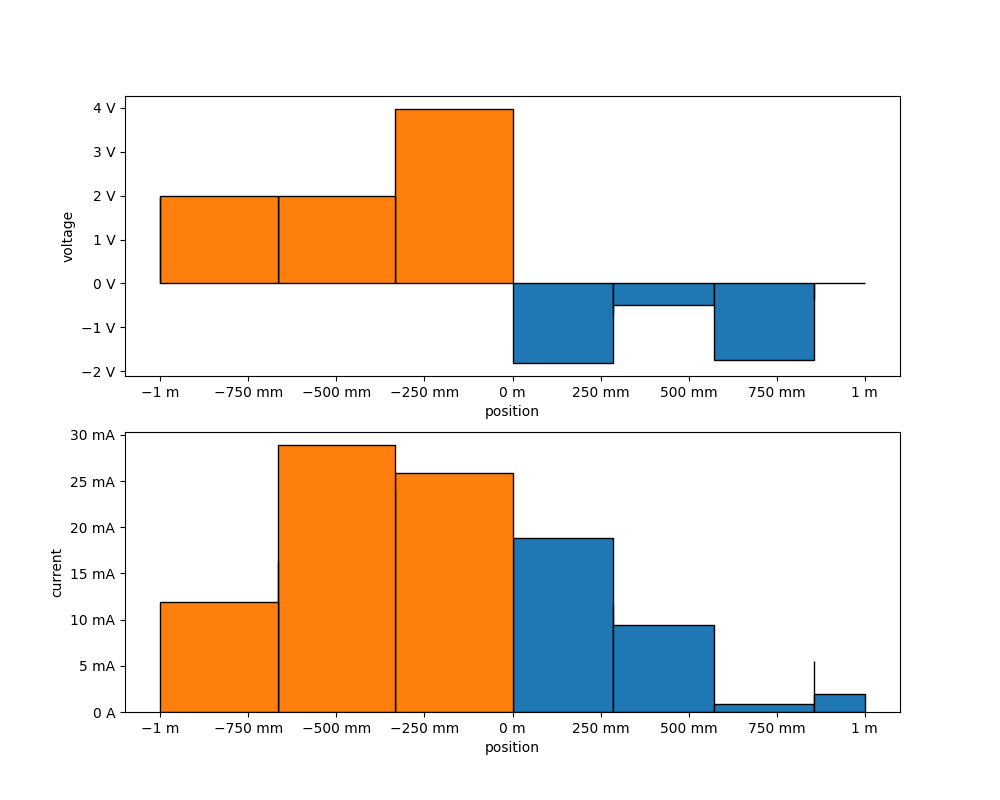

In [53]:
fig_2d, ax_2d = plt.subplots(2,1,figsize=(10, 8))

time = Decimal('100')

first_y_voltage_capacitor, first_y_voltage_inductor, first_y_current = plot_spatial_same_axis(time,data_output_merged,data_output_ordered,ax_2d)

(-0.11467244091521055, 0.10854722639801859)

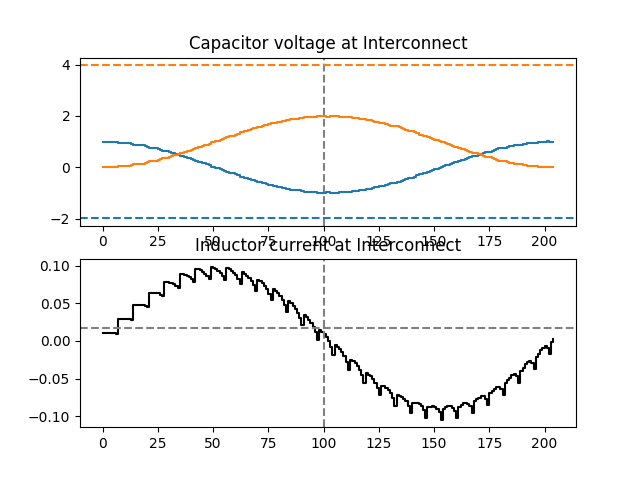

In [44]:
fig_time, ax_time = plt.subplots(2,1)

# time = 10
ax_time[0].axvline(time,linestyle='--',c='gray')

MC.plot_time_interconnect(data_output_ordered,ax_time[0],'voltage inductor',True)
ax_time[0].axhline(first_y_voltage_inductor,linestyle='--',c='C0')
MC.plot_time_interconnect(data_output_ordered,ax_time[0],'voltage capacitor',True)
ax_time[0].axhline(first_y_voltage_capacitor,linestyle='--',c='C1')

MC.plot_time_interconnect(data_output_ordered,ax_time[1],'current inductor',True)
ax_time[1].get_lines()[0].set_color("black")

y_limits = ax_time[1].get_ylim()

ax_time[1].axhline(first_y_current,linestyle='--',c='gray')
ax_time[1].axvline(time,linestyle='--',c='gray')
ax_time[1].set_ylim(y_limits)

# ax_time[0].set_xlim([0,50])

In [ ]:
from matplotlib.animation import FFMpegWriter
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Jonathan\\Documents\\Academic\\Masters\\Simulator\\Git\\Main_Algorithm\\ffmpeg\\bin\\ffmpeg.exe'

In [ ]:
fig_save = plt.figure()
ax_save = fig_save.add_subplot(111, projection='3d')

ax_save.xaxis.set_major_formatter(matplotlib.ticker.EngFormatter('m'))
ax_save.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter('A'))
ax_save.zaxis.set_major_formatter(matplotlib.ticker.EngFormatter('v'))
                
save_name= '3d_spatial'

start_time = Decimal('0')
end_time = Decimal('200')

fps = Decimal('30')
video_runtime = Decimal('60')
dpi = 300


number_frames =  video_runtime*fps
time_increment = (end_time - start_time)/number_frames

metadata = dict(title='Distributed Modelling', artist='Jonathan Meerholz')
writer = FFMpegWriter(fps=float(fps), metadata=metadata)

time = start_time
frame_counter = 0
with writer.saving(fig_save, (save_name+".mp4"), float(dpi)):
    
    for _ in range(0,int(number_frames)):
        ax_save.axes.set_xlim3d(left=-1, right=1) 
        # ax_save.axes.set_ylim3d(bottom=-0.004, top=0.004) 
        # ax_save.axes.set_zlim3d(bottom=-1, top=1) 
        ax_save.view_init(20, 80)
        
        plot_3d_spatial(time,data_output_merged,data_output_ordered,ax_save)
        writer.grab_frame()
        time += time_increment
        frame_counter +=1
        ax_save.clear()
        